## Titanic Ship Case Study
### Problem Description: 
### On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upperclass. The problem associated with the Titanic dataset is to predict whether a passenger survived the disaster or not. The dataset contains various features such as passenger class, age, gender, cabin, fare, and whether the passenger had any siblings or spouses on board. These features can be used to build a predictive model to determine the likelihood of a passenger surviving the disaster. The dataset offers opportunities for feature engineering, data visualization, and model selection, making it a valuable resource for developing and testing data analysis and machine learning skills. Perform Below Tasks to complete the assignment:-

### Q1. Download the dataset: Dataset

### Q2. Load the dataset.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('titanic.csv')
data.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### Q3. Perform Below Visualizations.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


#### ● Univariate Analysis

In [5]:
data['age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

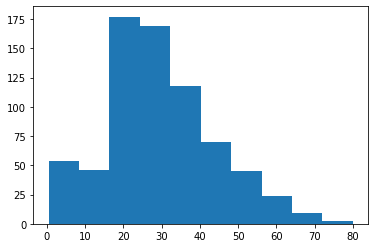

In [6]:
plt.hist(data['age'])

#### ● Bi - Variate Analysis

<BarContainer object of 891 artists>

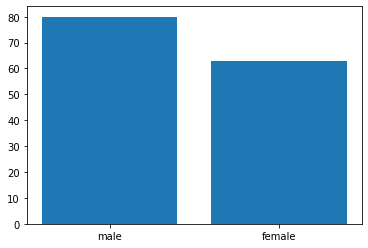

In [7]:
plt.bar(data['sex'],data['age'])

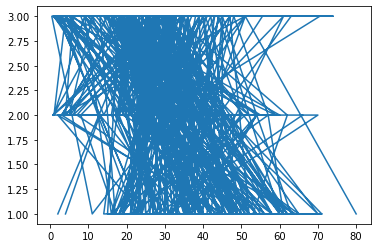

In [8]:
plt.plot(data['age'],data['pclass'])

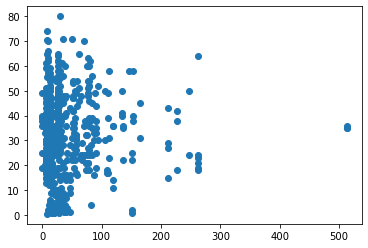

In [11]:
plt.scatter(data['fare'],data['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1fc616bcac0>,
 'caps': [<matplotlib.lines.Line2D at 0x1fc617010a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1fc616bc910>],
 'medians': [<matplotlib.lines.Line2D at 0x1fc61701640>],
 'fliers': [<matplotlib.lines.Line2D at 0x1fc61701910>],
 'means': []}

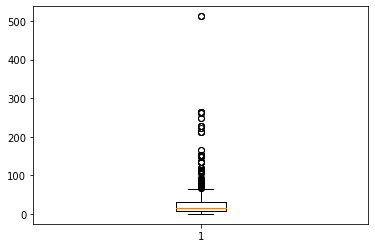

In [16]:
plt.boxplot(data['fare'])

#### ● Multi - Variate Analysis

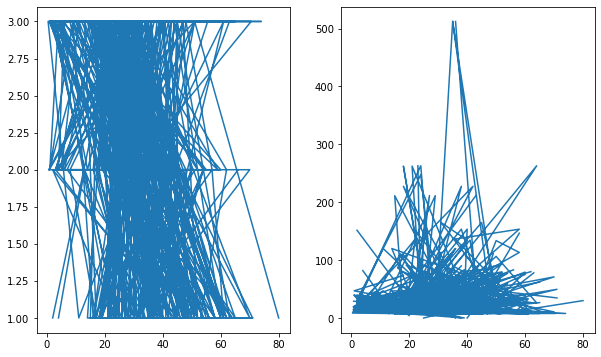

In [19]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
plt.plot(data['age'],data['pclass'])

plt.subplot(1,2,2)
plt.plot(data['age'],data['fare'])

### Q4.  Perform descriptive statistics on the dataset.

In [21]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
data.mean()

C:\Users\Sheet gupta\AppData\Local\Temp\ipykernel_2164\531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [23]:
data.median()

C:\Users\Sheet gupta\AppData\Local\Temp\ipykernel_2164\4184645713.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.median()


survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [24]:
data.mode()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,24.0,0,0,8.05,S,Third,man,True,C,Southampton,no,True


In [25]:
data.max()

C:\Users\Sheet gupta\AppData\Local\Temp\ipykernel_2164\2904433368.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.max()


survived             1
pclass               3
sex               male
age               80.0
sibsp                8
parch                6
fare          512.3292
class            Third
who              woman
adult_male        True
alive              yes
alone             True
dtype: object

In [26]:
data.min()

C:\Users\Sheet gupta\AppData\Local\Temp\ipykernel_2164\927168777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.min()


survived           0
pclass             1
sex           female
age             0.42
sibsp              0
parch              0
fare             0.0
class          First
who            child
adult_male     False
alive             no
alone          False
dtype: object

In [29]:
data.var()

C:\Users\Sheet gupta\AppData\Local\Temp\ipykernel_2164\445316826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.var()


survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [30]:
data.std()

C:\Users\Sheet gupta\AppData\Local\Temp\ipykernel_2164\2723740006.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.std()


survived       0.486592
pclass         0.836071
age           14.526497
sibsp          1.102743
parch          0.806057
fare          49.693429
adult_male     0.489615
alone          0.489615
dtype: float64

### Q5. Handle the Missing values.

In [31]:
data.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [32]:
data.isnull().any()

survived       False
pclass         False
sex            False
age             True
sibsp          False
parch          False
fare           False
embarked        True
class          False
who            False
adult_male     False
deck            True
embark_town     True
alive          False
alone          False
dtype: bool

In [33]:
data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [42]:
data['age'].fillna(data['age'].mean(),inplace=True)
data['embarked'].fillna(data['embarked'].mode(),inplace=True)
data['deck'].fillna(data['deck'].mode(),inplace=True)
data['embark_town'].fillna(data['embark_town'].mode(),inplace=True)

### Q6.  Find the outliers and replace the outliers

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

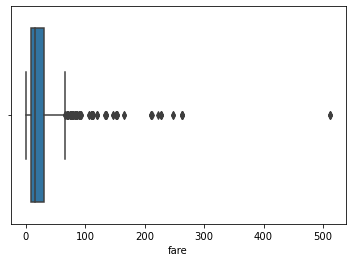

In [44]:
sns.boxplot(data.fare)

In [57]:
perc88=data.fare.quantile(0.88)
perc88

20.83000000000001

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare'>

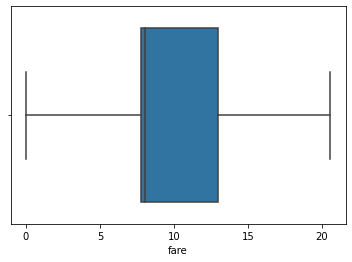

In [58]:
data=data[data.fare<=perc88]
sns.boxplot(data.fare)

### Q7. Check for Categorical columns and perform encoding.

In [59]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,C,Southampton,no,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,29.699118,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
8,1,3,female,27.000000,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False


In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [74]:
data.sex=le.fit_transform(data.sex)
data.embarked=le.fit_transform(data.embarked)
data.pclass=le.fit_transform(data.pclass)
data.who=le.fit_transform(data.who)
data.deck=le.fit_transform(data.deck)
data.embark_town=le.fit_transform(data.embark_town)
data.alive=le.fit_transform(data.alive)
data.adult_male=le.fit_transform(data.adult_male)
data.alone=le.fit_transform(data.alone)

In [75]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
0,0,2,1,22.000000,1,0,7.2500,2,1,1,2,2,0,0
2,1,2,0,26.000000,0,0,7.9250,2,2,0,7,2,1,1
4,0,2,1,35.000000,0,0,8.0500,2,1,1,7,2,0,1
5,0,2,1,29.699118,0,0,8.4583,1,1,1,7,1,0,1
8,1,2,0,27.000000,0,2,11.1333,2,2,0,7,2,1,0


### Q8. Split the data into dependent and independent variables.

In [77]:
y = data['survived']
y.head()

0    0
2    1
4    0
5    0
8    1
Name: survived, dtype: int64

In [78]:
X=data.drop(columns=['survived'],axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
0,2,1,22.000000,1,0,7.2500,2,1,1,2,2,0,0
2,2,0,26.000000,0,0,7.9250,2,2,0,7,2,1,1
4,2,1,35.000000,0,0,8.0500,2,1,1,7,2,0,1
5,2,1,29.699118,0,0,8.4583,1,1,1,7,1,0,1
8,2,0,27.000000,0,2,11.1333,2,2,0,7,2,1,0


### Q9. Scale the independent variables.

In [79]:
name=X.columns
name

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'who',
       'adult_male', 'deck', 'embark_town', 'alive', 'alone'],
      dtype='object')

In [80]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
X_scaled=scale.fit_transform(X)
X_scaled

array([[1.        , 1.        , 0.29328622, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.34764882, ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.46996466, ..., 1.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.33405817, ..., 1.        , 0.        ,
        1.        ],
       [0.5       , 1.        , 0.36123947, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 1.        , 0.42919272, ..., 0.5       , 0.        ,
        1.        ]])

In [81]:
X=pd.DataFrame(X_scaled,columns=name)
X

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
0,1.0,1.0,0.293286,0.25,0.000000,0.352369,1.0,0.5,1.0,0.285714,1.0,0.0,0.0
1,1.0,0.0,0.347649,0.00,0.000000,0.385176,1.0,1.0,0.0,1.000000,1.0,1.0,1.0
2,1.0,1.0,0.469965,0.00,0.000000,0.391252,1.0,0.5,1.0,1.000000,1.0,0.0,1.0
3,1.0,1.0,0.397922,0.00,0.000000,0.411096,0.5,0.5,1.0,1.000000,0.5,0.0,1.0
4,1.0,0.0,0.361239,0.00,0.666667,0.541108,1.0,1.0,0.0,1.000000,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,1.0,0.0,0.293286,0.00,0.000000,0.511140,1.0,1.0,0.0,1.000000,1.0,0.0,1.0
520,0.5,1.0,0.374830,0.00,0.000000,0.510328,1.0,0.5,1.0,1.000000,1.0,0.0,1.0
521,1.0,1.0,0.334058,0.00,0.000000,0.342649,1.0,0.5,1.0,1.000000,1.0,0.0,1.0
522,0.5,1.0,0.361239,0.00,0.000000,0.631835,1.0,0.5,1.0,1.000000,1.0,0.0,1.0


### Q10. Split the data into training and testing.

In [82]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
173,1.0,1.0,0.442783,0.0,0.0,0.421021,0.0,0.5,1.0,1.0,0.0,0.0,1.0
521,1.0,1.0,0.334058,0.0,0.0,0.342649,1.0,0.5,1.0,1.0,1.0,0.0,1.0
332,1.0,1.0,0.252514,0.0,0.0,0.383757,1.0,0.5,1.0,1.0,1.0,0.0,1.0
7,1.0,0.0,0.184561,0.0,0.0,0.381735,1.0,0.0,0.0,1.0,1.0,0.0,1.0
343,0.5,1.0,0.633052,0.0,0.0,0.729040,1.0,0.5,1.0,1.0,1.0,0.0,1.0


In [83]:
X_test.head()

,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
509,1.0,1.0,0.397922,0.0,0.0,0.461725,1.0,0.5,1.0,1.0,1.0,0.0,1.0
15,1.0,0.0,0.397922,0.0,0.0,0.382950,0.5,1.0,0.0,1.0,0.5,1.0,1.0
456,1.0,0.0,0.062245,0.0,0.0,0.606318,1.0,0.0,0.0,1.0,1.0,1.0,1.0
137,0.5,1.0,0.252514,0.0,0.0,0.510328,1.0,0.5,1.0,1.0,1.0,1.0,1.0
395,1.0,1.0,0.238924,0.0,0.0,0.377886,1.0,0.5,1.0,1.0,1.0,0.0,1.0


In [84]:
y_train

285    0
884    0
566    0
14     0
586    0
      ..
116    0
463    0
17     1
616    0
326    0
Name: survived, Length: 419, dtype: int64

In [85]:
y_test

868    0
28     1
777    1
226    1
675    0
      ..
776    0
350    0
613    0
622    1
282    0
Name: survived, Length: 105, dtype: int64